# <center>Model Training and Evaluation</center>

# A) Regression

<h3> 1. Importing Libraries</h3>

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

<h3> 2. Train Test Split </h3>

In [135]:
linear_data = pd.read_csv('linear_data_cleaned.csv')

In [136]:
x = linear_data.iloc[:,:-1]
x

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
0,29,57,18,0.0,65.7,3.4,1.3
1,29,61,13,1.3,64.4,4.1,1.0
2,26,82,22,13.1,47.1,2.5,0.3
3,25,89,13,2.5,28.6,1.3,0.0
4,27,77,16,0.0,64.8,3.0,1.2
...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,4.5
239,28,87,15,4.4,41.1,6.5,0.1
240,27,87,29,0.5,45.9,3.5,0.4
241,24,54,18,0.1,79.7,4.3,1.7


In [137]:
y = linear_data.iloc[:,-1]
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [139]:
x_train.shape

(182, 7)

In [140]:
x_test.shape

(61, 7)

<h3> 3. Feature Scaling</h3>

In [141]:
def standard_scaler(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    return x_train_scaled, x_test_scaled

In [142]:
x_train_scaled, x_test_scaled = standard_scaler(x_train, x_test)

Text(0.5, 1.0, 'X_train after scaling')

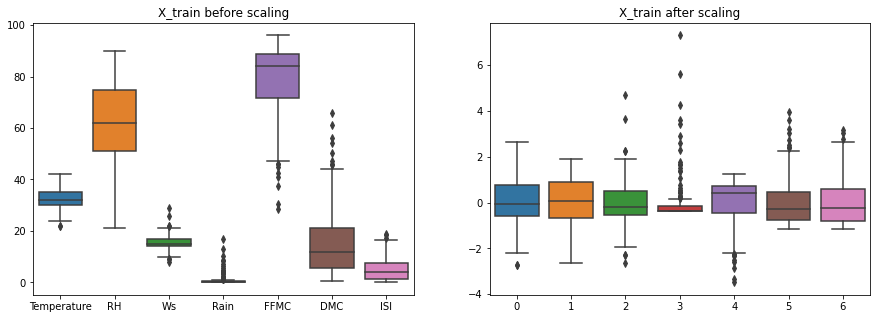

In [143]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data= x_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data= x_train_scaled)
plt.title('X_train after scaling')

<h3> 4. Model Training</h3>

In [144]:
def train_model(models,model_names, x_train_scaled, x_test_scaled, y_train, y_test):
    model_res = []
    for model in range(len(models)):
        regressor = models[model]
        regressor.fit(x_train_scaled, y_train)
        y_pred = regressor.predict(x_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_res.append(r2)
        print(f"{'-'*30} {model_names[model]} {'-'*30}")
        print(f'Mean Absolute Error : {mae}')
        print(f'R2 Score : {r2}')
        print('*'*80)
        
    return pd.DataFrame(list(zip(model_names, model_res)), columns = ['Model', 'R2_Score'])    

In [145]:
linear_models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), XGBRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

In [146]:
linear_model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'XGB Regressor', 'Random Forest Regressor', 'K Neighbors Regressor']

In [147]:
model_res = train_model(linear_models,linear_model_names, x_train_scaled, x_test_scaled, y_train, y_test)

------------------------------ Linear Regression ------------------------------
Mean Absolute Error : 0.7123674928595761
R2 Score : 0.9649932926605853
********************************************************************************
------------------------------ Ridge Regression ------------------------------
Mean Absolute Error : 0.7308753011423653
R2 Score : 0.9639742744830117
********************************************************************************
------------------------------ Lasso Regression ------------------------------
Mean Absolute Error : 1.1209175798372668
R2 Score : 0.9376608745831527
********************************************************************************
------------------------------ ElasticNet Regression ------------------------------
Mean Absolute Error : 1.8051339423993138
R2 Score : 0.8600373401485383
********************************************************************************
------------------------------ SVR ------------------------------
Mean

In [148]:
model_res

,Model,R2_Score
0,Linear Regression,0.964993
1,Ridge Regression,0.963974
2,Lasso Regression,0.937661
3,ElasticNet Regression,0.860037
4,SVR,0.934639
5,XGB Regressor,0.975867
6,Random Forest Regressor,0.981214
7,K Neighbors Regressor,0.946593


In [149]:
model_res['R2_Score'].nlargest(2)

6    0.981214
5    0.975867
Name: R2_Score, dtype: float64

- As we see here, XGBoostRegressor and Random Forest Dregressor are the two most accurate models.
- So we will perform hyperparameter tuning on these two models

<h3> 5. Hyperparamter Tuning</h3>

<h3> Tuning XGBoostRegressor</h3>

In [150]:
params_grid = [{'learning_rate' : [0.1,0.2,0.3,0.35],
             'max_depth' : [6,8,9],
             'gamma': [0.1, 0.3, 0.4, 0.5 ]
}]

In [151]:
#params_grid2 = [{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators' : [75, 100, 150, 200, 250]}]

In [152]:
xgb = XGBRegressor()

In [153]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [154]:
#xgb2 = XGBRegressor(gamma= 0.3, learning_rate= 0.1, max_depth= 9, n_estimators = 200)

In [155]:
#xgb2.fit(x_train_scaled, y_train)

In [156]:
#yp = xgb2.predict(x_test_scaled)

In [157]:
#r2_score(y_test, yp)

In [158]:
gcv_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params_grid,n_iter = 100, cv = 5, verbose = 2)

In [159]:
gcv_xgb.fit(x_train_scaled, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=6; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=6; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=6; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=6; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=6; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=8; total time=   0.2s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=8; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=8; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=8; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=8; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1, max_depth=9; total time=   0.1s
[CV] END ..........gamma=0.1, learning_rate=0.1

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          max_delta_step=None, max_depth=None,
                           

In [160]:
gcv_xgb.best_params_

{'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.3}

In [161]:
best_xgb_estimator = gcv_xgb.best_estimator_
xgb_y_pred = best_xgb_estimator.predict(x_test_scaled)
mae = mean_absolute_error(y_test, xgb_y_pred)
r2 = r2_score(y_test, xgb_y_pred)
print('XGBoost Regressor Tuned')
print('R2 Score : ', r2)
print('Mean Absolute Error : ', mae)

XGBoost Regressor Tuned
R2 Score :  0.9787067497759518
Mean Absolute Error :  0.6050412788254317


<h3> Tuning Random Forest Regressor</h3>

In [162]:
grid_params2 = [{'bootstrap': [True, False],
             'max_depth': [10, 30,50,70,90,100,125],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [50,100,150,200,250,300]
}]

In [163]:
rfr = RandomForestRegressor()

In [164]:
rfr_gcv = RandomizedSearchCV(estimator = rfr, param_distributions = grid_params2,n_iter = 100, cv = 5, verbose = 2)

In [165]:
rfr_gcv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 30, 50, 70, 90, 100,
                                                       125],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 4],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [50, 100, 150, 200,
                                                          250, 300]}],
                   verbose=2)

In [166]:
rfr_gcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [167]:
best_rfr_estimator = rfr_gcv.best_estimator_
rfr_y_pred = best_rfr_estimator.predict(x_test_scaled)
mae = mean_absolute_error(y_test, rfr_y_pred)
r2 = r2_score(y_test, rfr_y_pred)
print('Random Forest Regressor Tuned')
print('R2 Score : ', r2)
print('Mean Absolute Error : ', mae)

Random Forest Regressor Tuned
R2 Score :  0.9795636889434814
Mean Absolute Error :  0.601537034868592


<h3> Model Deployment</h3>

In [168]:
import pickle

In [169]:
pickle.dump(best_xgb_estimator, open('regression.pkl', 'wb'))

In [170]:
rg_pickled_model = pickle.load(open('regression.pkl', 'rb'))

In [171]:
rg_pickled_model.predict(x_test_scaled)

array([10.059076  ,  7.009816  ,  7.258149  ,  4.354064  ,  7.9124327 ,
       13.094955  ,  0.21338336,  9.040291  ,  6.2978797 , 14.118885  ,
        1.0611591 , 14.610888  ,  5.341538  , 14.768821  ,  0.71340466,
        0.26556516,  1.1170241 ,  2.1263504 ,  4.6570163 ,  0.3091214 ,
        5.8598456 ,  6.079256  ,  4.278066  ,  0.21338336,  2.6297576 ,
        3.0466871 , 11.235531  ,  0.43555093,  0.24348442,  0.7292873 ,
       17.57545   ,  0.46512282,  0.28877565, 21.712004  ,  4.6570163 ,
        0.78956383,  0.8331201 , 16.744015  , 29.349216  ,  1.4792482 ,
        6.27883   ,  0.7345985 ,  0.16173054,  1.9470898 ,  0.7877323 ,
        0.16173054,  3.5470939 ,  6.6998253 ,  0.16173054,  5.3852415 ,
        4.6570163 , 10.844801  ,  0.19130243,  2.6297576 ,  5.3314815 ,
        2.6230266 , 11.970528  ,  3.0440896 ,  2.8678594 , 19.163216  ,
        2.748254  ], dtype=float32)



# B) Classification

<h3> 1. Importing Libraries</h3>

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score, plot_confusion_matrix

<h3> 2. Train Test Split </h3>

In [173]:
classification_data = pd.read_csv('classification_data_cleaned.csv')

In [174]:
x = classification_data.iloc[:,:-1]
x

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
0,29,57,18,0.0,65.7,3.4,1.3
1,29,61,13,1.3,64.4,4.1,1.0
2,26,82,22,13.1,47.1,2.5,0.3
3,25,89,13,2.5,28.6,1.3,0.0
4,27,77,16,0.0,64.8,3.0,1.2
...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,4.5
239,28,87,15,4.4,41.1,6.5,0.1
240,27,87,29,0.5,45.9,3.5,0.4
241,24,54,18,0.1,79.7,4.3,1.7


In [175]:
y = classification_data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [177]:
x_train.shape

(182, 7)

In [178]:
x_test.shape

(61, 7)

<h3> 3. Feature Scaling</h3>

In [179]:
def standard_scaler(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    return x_train_scaled, x_test_scaled

In [180]:
x_train_scaled, x_test_scaled = standard_scaler(x_train, x_test)

Text(0.5, 1.0, 'X_train after scaling')

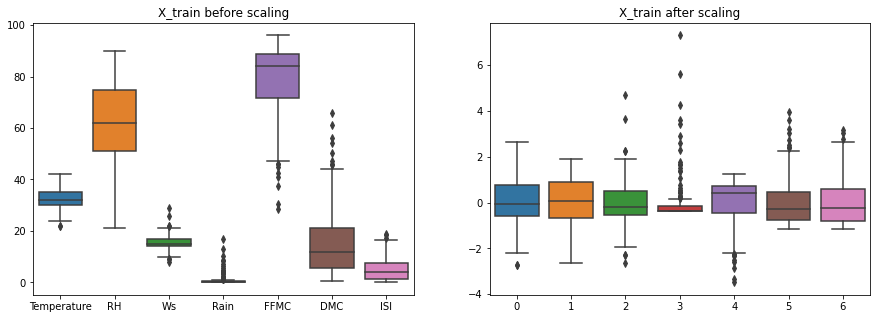

In [181]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data= x_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data= x_train_scaled)
plt.title('X_train after scaling')

<h3> 4. Model Training</h3>

In [182]:
def train_model_classification(models,model_names, x_train_scaled, x_test_scaled, y_train, y_test):
    model_res = []
    for model in range(len(models)):
        regressor = models[model]
        regressor.fit(x_train_scaled, y_train)
        y_pred = regressor.predict(x_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        model_res.append(accuracy)
        print(f"{'-'*30} {model_names[model]} {'-'*30}")
        print("Accuracy Score value: {:.4f}".format(accuracy))
        print(f'Classification_report : {cr}')
        plt.title(f'{model_names[model]} confusion matrix')
        plot_confusion_matrix(regressor,x_test_scaled, y_test)
        print('*'*80)
        
    return pd.DataFrame(list(zip(model_names, model_res)), columns = ['Model', 'Accuracy Score value'])    

In [183]:
classification_models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), XGBClassifier(), SVC(), DecisionTreeClassifier(), GaussianNB()]

In [184]:
classification_models_names = ['Logistic Regression', 'K-Nearest Classifier','Random Forest Classifier','XGB Classifier', 'SVC', 'Decision Tree Classifier', 'Naive Bayes Classifier']

------------------------------ Logistic Regression ------------------------------
Accuracy Score value: 0.9016
Classification_report :               precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.97      0.86      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61

********************************************************************************
------------------------------ K-Nearest Classifier ------------------------------
Accuracy Score value: 0.9016
Classification_report :               precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.94      0.89      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90      

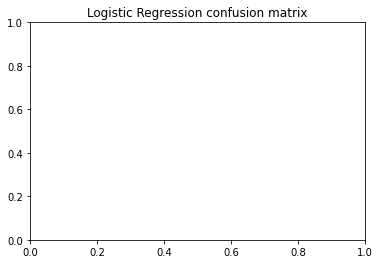

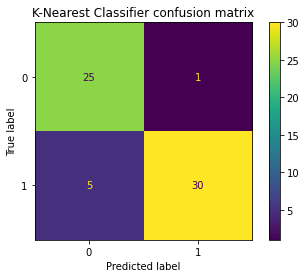

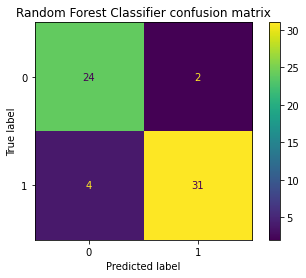

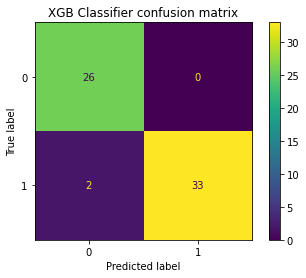

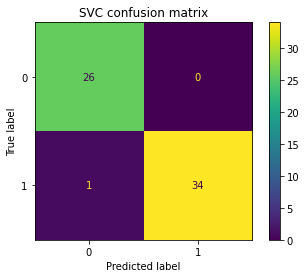

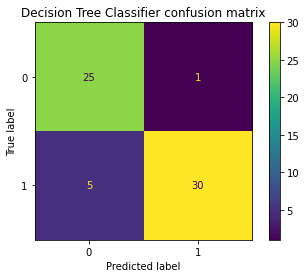

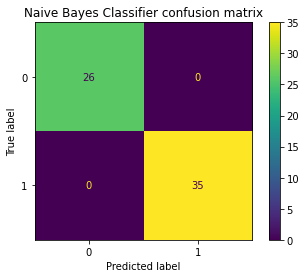

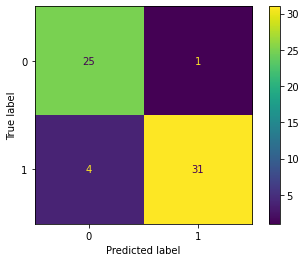

In [185]:
model_res = train_model_classification(classification_models,classification_models_names, x_train_scaled, x_test_scaled, y_train, y_test)

In [186]:
model_res

,Model,Accuracy Score value
0,Logistic Regression,0.901639
1,K-Nearest Classifier,0.901639
2,Random Forest Classifier,0.967213
3,XGB Classifier,0.983607
4,SVC,0.901639
5,Decision Tree Classifier,1.000000
6,Naive Bayes Classifier,0.918033


In [187]:
model_res['Accuracy Score value'].nlargest(2)

5    1.000000
3    0.983607
Name: Accuracy Score value, dtype: float64

- As we see here, XGBoostRegressor and Random Forest Dregressor are the two most accurate models.
- So we will perform hyperparameter tuning on these two models

<h3> 5. Hyperparamter Tuning</h3>

<h3> Tuning XGBoostClassifier</h3>

In [188]:
params_grid_a = [{'max_depth':[1,2,3,4,5,6,7,8,9,10],
                'n_estimators': [50,75,100,125,150,175,200,250],
                'gamma': [1,2,3,4,5],
                'learning_rate' : [.1,.2,.3],
                'reg_alpha': [1.1, 1.2, 1.3],
                'reg_lambda': [1.1, 1.2, 1.3],
                'subsample': [0.7, 0.8, 0.9]
}]

In [189]:
xgbc = XGBClassifier()

In [190]:
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [191]:
gcv_xgbc = RandomizedSearchCV(estimator = xgbc, param_distributions = params_grid_a,n_iter = 100, cv = 5, verbose = 2)

In [192]:
gcv_xgbc.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END gamma=2, learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=1.2, reg_lambda=1.1, subsample=0.8; total time=   0.2s
[CV] END gamma=2, learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=1.2, reg_lambda=1.1, subsample=0.8; total time=   0.2s
[CV] END gamma=2, learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=1.2, reg_lambda=1.1, subsample=0.8; total time=   0.3s
[CV] END gamma=2, learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=1.2, reg_lambda=1.1, subsample=0.8; total time=   0.2s
[CV] END gamma=2, learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=1.2, reg_lambda=1.1, subsample=0.8; total time=   0.2s
[CV] END gamma=1, learning_rate=0.3, max_depth=1, n_estimators=75, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8; total time=   0.0s
[CV] END gamma=1, learning_rate=0.3, max_depth=1, n_estimators=75, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8; total time=   0.0s
[CV] END

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [193]:
gcv_xgbc.best_params_

{'subsample': 0.8,
 'reg_lambda': 1.2,
 'reg_alpha': 1.1,
 'n_estimators': 200,
 'max_depth': 2,
 'learning_rate': 0.3,
 'gamma': 2}

In [194]:
best_xgbc_estimator = gcv_xgbc.best_estimator_
xgbc_y_pred = best_xgbc_estimator.predict(x_test_scaled)
mae = mean_absolute_error(y_test, xgbc_y_pred)
acc_score = accuracy_score(y_test, xgbc_y_pred)
print('XGBoost Classifier Tuned')
print('Accuracy Score : ', acc_score)
print('Mean Absolute Error : ', mae)

XGBoost Classifier Tuned
Accuracy Score :  1.0
Mean Absolute Error :  0.0


<h3> Tuning Decision Tree Classiifer</h3>

In [195]:
param_grid_b = [{
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}]

In [196]:
dtc = DecisionTreeClassifier()

In [197]:
dtc_gcv = GridSearchCV(estimator = dtc, param_grid = param_grid_b, cv = 5, verbose = 2)

In [198]:
dtc_gcv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=7; total time=   0.0s
[CV] END max_depth=3, min_samples_le

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 5, 10, 15, 20, None],
                          'min_samples_leaf': [1, 2, 5],
                          'min_samples_split': [2, 5, 7, 10]}],
             verbose=2)

In [199]:
dtc_gcv.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [200]:
best_dtc_estimator = dtc_gcv.best_estimator_
dtc_y_pred = best_dtc_estimator.predict(x_test_scaled)
mae = mean_absolute_error(y_test, dtc_y_pred)
acc_score2 = accuracy_score(y_test,dtc_y_pred)
print('Decision Tree Tuned')
print('Accuracy Score : ', acc_score2)
print('Mean Absolute Error : ', mae)

Decision Tree Tuned
Accuracy Score :  0.9344262295081968
Mean Absolute Error :  0.06557377049180328


<h3> Applying Stratified k-fold sampling to know exact mean cv scores of two best model</h3>

In [201]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [202]:
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

In [203]:
cv_xgb = cross_val_score(best_xgbc_estimator, x,y,cv = skfold, scoring = 'accuracy').mean()
print('CV Score of Tuned XGB Classifier : {:.4f}'.format(cv_xgb))

CV Score of Tuned XGB Classifier : 0.9797


In [204]:
cv_dtc = cross_val_score(best_dtc_estimator, x,y,cv = skfold, scoring = 'accuracy').mean()
print('CV Score of Tuned Decision Tree Classifier : {:.4f}'.format(cv_dtc))

CV Score of Tuned Decision Tree Classifier : 0.9755


# Result - As the Decision Tree Classifier, gives the appropiate accuracy, we will use XGBoost Classifier for our Classification problem statement

<h3> Model Deployment</h3>

In [205]:
dtc_y_pred = best_dtc_estimator.predict(x_test_scaled)
acc_score2 = accuracy_score(y_test,dtc_y_pred)
cr = classification_report(y_test, dtc_y_pred)
print('Final Decision Tree')
print('Accuracy Score : ', acc_score2)
print('Classification Report' , cr)

Final Decision Tree
Accuracy Score :  0.9344262295081968
Classification Report               precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.89      0.94        35

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



- Dumping the model into pickle file

In [206]:
import pickle

In [207]:
pickle.dump(best_dtc_estimator, open('classification.pkl', 'wb'))

In [208]:
cf_pickled_model = pickle.load(open('classification.pkl', 'rb'))

In [209]:
cf_pickled_model.predict(x_test_scaled)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)